In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import matplotlib as mpl
# mpl.rcParams['figure.figsize'] = (12,8)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir())

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'gender_submission.csv', 'submission_052618.csv', 'test.csv', 'Titanic_052518.ipynb', 'Titanic_052618.ipynb', 'titanic_112117.html', 'titanic_112517.html', 'titanic_121217.html', 'train.csv']


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
combine = pd.concat([train.drop(["Survived"], axis=1), test], axis=0)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Preprocessing
   - Drop "PassengerId", "Name", "Ticket", "Cabin"
   - Digitize "Sex"
   - Fill the NaN in "Age", "Embarked"
   - Digitize "Embarked"
   - Try scaling

In [5]:
train = train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
train["Sex"] = np.where(train["Sex"]=="female", 1, 0)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


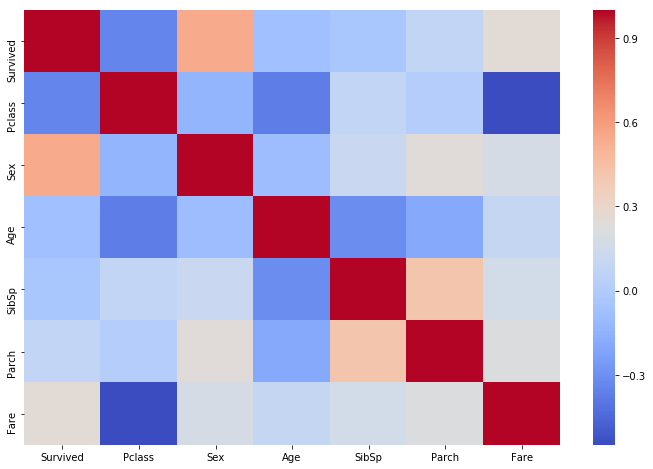

In [7]:
corr = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="coolwarm")

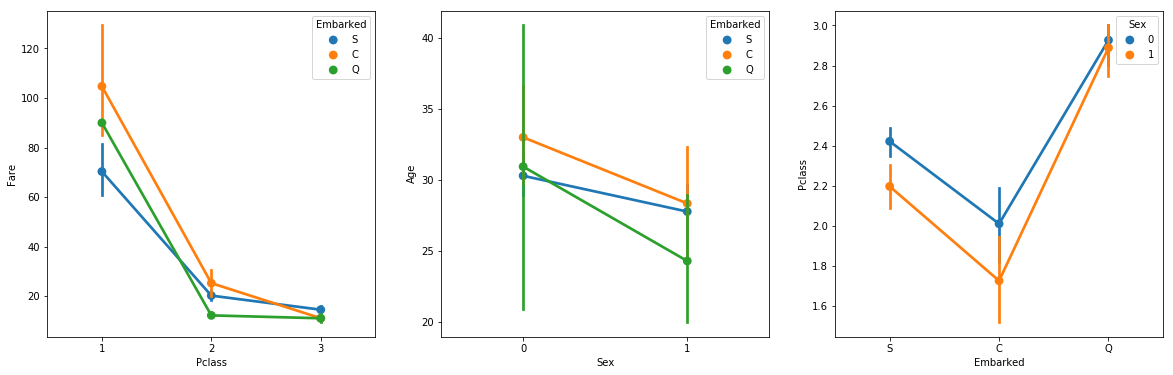

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.pointplot(x="Pclass", y="Fare", hue="Embarked", data=train, ax=axes[0])
sns.pointplot(x="Sex", y="Age", hue="Embarked", data=train, ax=axes[1])
sns.pointplot(x="Embarked", y="Pclass", hue="Sex", data=train, ax=axes[2])

In [9]:
print("{}{}".format("survival rate: \n", train.groupby("Embarked")["Survived"].mean()))
print("{}{}".format("count: \n", train.groupby(["Pclass", "Sex"])["Embarked"].value_counts().unstack()))

survival rate: 
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64
count: 
Embarked     C   Q    S
Pclass Sex             
1      0    42   1   79
       1    43   1   48
2      0    10   1   97
       1     7   2   67
3      0    43  39  265
       1    23  33   88


In [10]:
train.loc[train["Embarked"].isnull()==True, :]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,1,38.0,0,0,80.0,NaN
829,1,1,1,62.0,0,0,80.0,NaN


In [11]:
combine.query("Sex=='1' & Pclass==1 & 70 < Fare < 90")["Embarked"].mode()

Series([], dtype: object)

In [12]:
train.loc[train["Embarked"].isnull()==True, "Embarked"] = "C"
train.loc[train["Fare"]==80, :]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,1,38.0,0,0,80.0,C
829,1,1,1,62.0,0,0,80.0,C


In [13]:
train.loc[train["Age"].isnull()==True, :][:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,0,NaN,0,0,8.4583,Q
17,1,2,0,NaN,0,0,13.0000,S
19,1,3,1,NaN,0,0,7.2250,C
26,0,3,0,NaN,0,0,7.2250,C
28,1,3,1,NaN,0,0,7.8792,Q


C:\Users\yumeng.zou\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\yumeng.zou\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


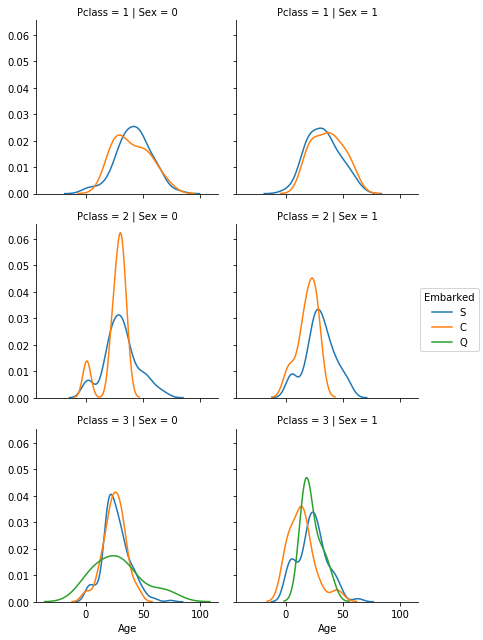

In [14]:
g = sns.FacetGrid(train, col="Sex", row="Pclass", hue="Embarked")
g.map(sns.kdeplot, "Age").add_legend()

In [15]:
combine["Sex"] = np.where(combine["Sex"]=="female", 1, 0)
def fill_age(df):
    for pclass in df["Pclass"].unique():
        for sex in df["Sex"].unique():
            for embark in df["Embarked"].unique():
                query_str = "Pclass=={} & Sex=={} & Embarked=='{}'".format(pclass, sex, embark)
                median_age = combine.query(query_str)["Age"].median()
                print("Pclass={}, Sex={}, Embarked={}: median age {}".format(pclass, sex, embark, median_age))
                df.loc[df.query(query_str + "& Age=='NaN'").index.values, "Age"] = median_age
fill_age(train)
train.loc[train["Age"].isnull()==True, :]

Pclass=3, Sex=0, Embarked=S: median age 25.0
Pclass=3, Sex=0, Embarked=C: median age 24.25
Pclass=3, Sex=0, Embarked=Q: median age 25.0
Pclass=3, Sex=1, Embarked=S: median age 22.0
Pclass=3, Sex=1, Embarked=C: median age 15.0
Pclass=3, Sex=1, Embarked=Q: median age 22.0
Pclass=1, Sex=0, Embarked=S: median age 42.0
Pclass=1, Sex=0, Embarked=C: median age 39.0
Pclass=1, Sex=0, Embarked=Q: median age 44.0
Pclass=1, Sex=1, Embarked=S: median age 34.0
Pclass=1, Sex=1, Embarked=C: median age 38.0
Pclass=1, Sex=1, Embarked=Q: median age 35.0
Pclass=2, Sex=0, Embarked=S: median age 29.0
Pclass=2, Sex=0, Embarked=C: median age 29.0
Pclass=2, Sex=0, Embarked=Q: median age 59.0
Pclass=2, Sex=1, Embarked=S: median age 28.0
Pclass=2, Sex=1, Embarked=C: median age 23.0
Pclass=2, Sex=1, Embarked=Q: median age 30.0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [16]:
train["Family"] = train["SibSp"] + train["Parch"]

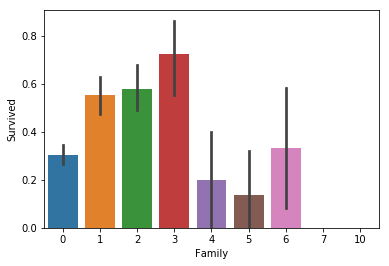

In [17]:
sns.barplot(x="Family", y="Survived", data=train)

In [18]:
train = pd.get_dummies(train, drop_first=True)

In [19]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,1,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,1,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [20]:
y_train = train["Survived"].values
X_train = train.drop(["Survived"], axis=1).values

In [21]:
train_scaled = train.copy()
def scale(series):
    min_ = series.min()
    range_ = (series - min_).max()
    return (series - min_)/range_
train_scaled["Age"] = scale(train_scaled["Age"])
train_scaled["Fare"] = scale(train_scaled["Fare"])
train_scaled.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Embarked_Q,Embarked_S
0,0,3,0,0.271174,1,0,0.014151,1,0,1
1,1,1,1,0.472229,1,0,0.139136,1,0,0
2,1,3,1,0.321438,0,0,0.015469,0,0,1
3,1,1,1,0.434531,1,0,0.103644,1,0,1
4,0,3,0,0.434531,0,0,0.015713,0,0,1


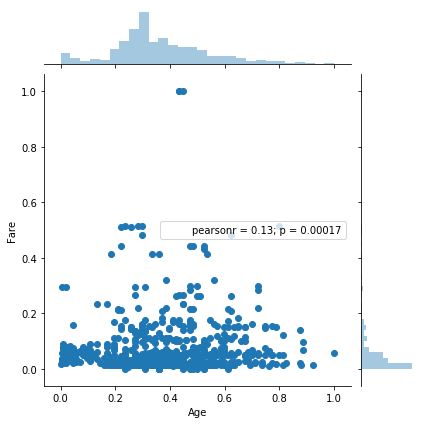

In [22]:
sns.jointplot("Age", "Fare", train_scaled)

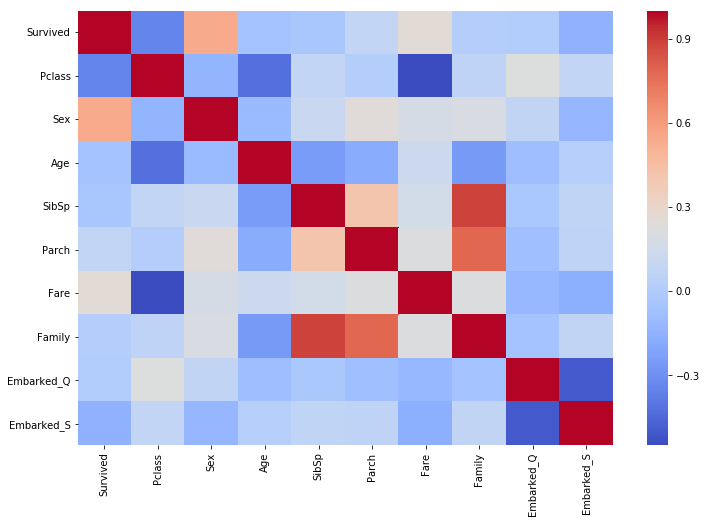

In [23]:
corr = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="coolwarm")

In [24]:
X_train_scaled = train_scaled.drop(["Survived"], axis=1).values

## Classification - Not need to scale
- Logistic Regression
- Naive Bayes
- Decision Tree
- Random Forest
- Gradient Boosting

In [25]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [26]:
def print_feature_weight(feature_importances_):
    f_weight = ["{:.0%}".format(f) for f in feature_importances_]
    for line in (train.columns[1:], f_weight):
        print("{:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>12} {:>12}".format(*line))

In [27]:
Cs = np.logspace(-3, 3, 7)
logreg_cv = LogisticRegressionCV(Cs, cv=5, max_iter=1000).fit(X_train, y_train)
print("C: ", logreg_cv.C_)
print("{:.1%}".format(logreg_cv.score(X_train, y_train)))
print_feature_weight(logreg_cv.coef_[0])

C:  [0.1]
81.7%
  Pclass      Sex      Age    SibSp    Parch     Fare   Family   Embarked_Q   Embarked_S
    -94%     197%      -4%     -18%       7%       0%     -10%           1%         -27%


In [28]:
nb_cv_score = cross_val_score(GaussianNB(), X_train, y_train, cv=5)
print(nb_cv_score)
print("{:.1%}".format(nb_cv_score.mean()))

[0.73743017 0.78212291 0.78651685 0.79775281 0.79096045]
77.9%


In [29]:
params = {"max_depth":np.linspace(1, 20, 20)}
tree_cv = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
tree_cv.fit(X_train, y_train)
print(tree_cv.best_params_)
print("{:.1%}".format(tree_cv.best_score_))

{'max_depth': 5.0}
81.5%


In [30]:
params = {"n_estimators": np.linspace(10, 30, 5, dtype="int_"),
          "max_depth": np.linspace(1, 20, 8, dtype="int_")}
rf_cv = GridSearchCV(RandomForestClassifier(), params, cv=5)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)
print("{:.1%}".format(rf_cv.best_score_))

{'max_depth': 9, 'n_estimators': 10}
83.3%


In [31]:
params = {"n_estimators": np.logspace(1, 2.7, 5, dtype="int_"),
          "max_depth": np.linspace(1, 6, 3, dtype="int_"),
          "learning_rate": np.logspace(-2, 0, 5)}
gb_cv = GridSearchCV(GradientBoostingClassifier(), params, cv=5)
gb_cv.fit(X_train, y_train)
print(gb_cv.best_params_)
print("{:.1%}".format(gb_cv.best_score_))

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 316}
84.1%


## Classification - Need Scaling
- K-Nearest-Neighbors
- SVM
- Neural Network

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [33]:
params = {"n_neighbors": np.linspace(4, 26, 11, dtype="int_")}
knn_cv = GridSearchCV(KNeighborsClassifier(), params, cv=5)
knn_cv.fit(X_train_scaled, y_train)
print(knn_cv.best_params_)
print("{:.1%}".format(knn_cv.best_score_))

{'n_neighbors': 10}
80.0%


In [34]:
params = {"C":np.logspace(-2, 4, 7),
          "gamma": ("auto", 0.1, 0.01)}
svc_cv = GridSearchCV(SVC(), params, cv=5)
svc_cv.fit(X_train_scaled, y_train)
print(svc_cv.best_params_)
print("{:.1%}".format(svc_cv.best_score_))

{'C': 1000.0, 'gamma': 0.01}
82.0%


In [35]:
mlp = MLPClassifier(max_iter=1000)
mlp_cv_score = cross_val_score(mlp, X_train_scaled, y_train, cv=5)
print(mlp_cv_score)
print("{:.1%}".format(mlp_cv_score.mean()))

[0.79888268 0.82122905 0.78651685 0.79213483 0.81920904]
80.4%


Gradient Boosting Classifier achieves the highest CV accuracy, 84.2%

In [36]:
clf = gb_cv.best_estimator_
print_feature_weight(clf.feature_importances_)

  Pclass      Sex      Age    SibSp    Parch     Fare   Family   Embarked_Q   Embarked_S
      4%       6%      35%       2%       2%      42%       7%           1%           2%


## Test Set

In [37]:
test = test.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
test["Sex"] = np.where(test["Sex"]=="female", 1, 0)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int32
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 21.3+ KB


fill the NaN in "Age" and "Fare"

In [38]:
fill_age(test)
test.loc[test["Age"].isnull()==True, :]

Pclass=3, Sex=0, Embarked=Q: median age 25.0
Pclass=3, Sex=0, Embarked=S: median age 25.0
Pclass=3, Sex=0, Embarked=C: median age 24.25
Pclass=3, Sex=1, Embarked=Q: median age 22.0
Pclass=3, Sex=1, Embarked=S: median age 22.0
Pclass=3, Sex=1, Embarked=C: median age 15.0
Pclass=2, Sex=0, Embarked=Q: median age 59.0
Pclass=2, Sex=0, Embarked=S: median age 29.0
Pclass=2, Sex=0, Embarked=C: median age 29.0
Pclass=2, Sex=1, Embarked=Q: median age 30.0
Pclass=2, Sex=1, Embarked=S: median age 28.0
Pclass=2, Sex=1, Embarked=C: median age 23.0
Pclass=1, Sex=0, Embarked=Q: median age 44.0
Pclass=1, Sex=0, Embarked=S: median age 42.0
Pclass=1, Sex=0, Embarked=C: median age 39.0
Pclass=1, Sex=1, Embarked=Q: median age 35.0
Pclass=1, Sex=1, Embarked=S: median age 34.0
Pclass=1, Sex=1, Embarked=C: median age 38.0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


C:\Users\yumeng.zou\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\yumeng.zou\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


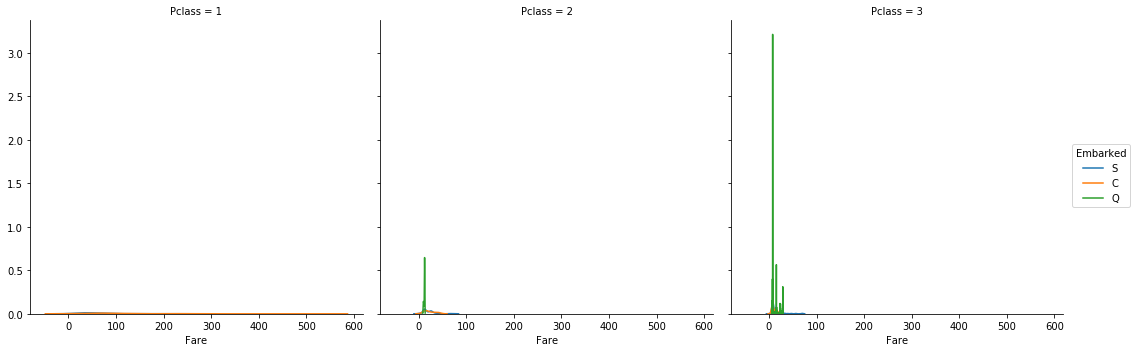

In [39]:
g = sns.FacetGrid(combine, col="Pclass", hue="Embarked", size=5)
g.map(sns.kdeplot, "Fare").add_legend()

In [40]:
test.loc[test["Fare"].isnull()==True, :]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,0,60.5,0,0,NaN,S


In [41]:
test.query("Pclass==3 & Embarked=='S'")["Fare"].median()

8.05

In [42]:
test.loc[test["Fare"].isnull()==True, "Fare"] = test.query("Pclass==3 & Embarked=='S'")["Fare"].median()

create "Family" feature  

In [43]:
test["Family"] = test["SibSp"] + test["Parch"]

make "Embarked" dummy variables

In [44]:
test = pd.get_dummies(test, drop_first=True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,1,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,2,0,1


In [45]:
X_test = test.values

In [46]:
y_pred = clf.predict(X_test)

In [47]:
submission = pd.DataFrame({"PassengerId": np.arange(len(y_pred))+892, "Survived": y_pred})
submission.to_csv("submission_052618.csv", index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
